In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt

In [ ]:
from networks import FCN
layers=[3,50,50,50,50,50,50,1]
PINN=FCN(layers)

In [77]:
data = np.load(r'F:\Synthetic_data_no_defect\2025_11_18_sample_100x100x5mm_no_defect_isotropic_gaussian_heat_no_conv_cond_5.npz', allow_pickle=True)

In [78]:
data['meta']

array([['time', '18/11/2025 21:36:12'],
       ['lamp_power', '200'],
       ['lamp_power_units', 'W'],
       ['T1', '4'],
       ['T1_units', 'frames'],
       ['T2', '30'],
       ['T2_units', 'frames'],
       ['T3', '300'],
       ['T3_units', 'frames'],
       ['fps', '30.0'],
       ['fps_units', 'frames/s'],
       ['height', '512'],
       ['height_units', 'pixels'],
       ['width', '512'],
       ['width_units', 'pixels'],
       ['sequence_length', '334'],
       ['sequence_length_units', 'frames'],
       ['working_distance', '200.0'],
       ['working_distance_units', 'mm'],
       ['thickness', '0.005'],
       ['thickness_units', 'm'],
       ['size_X', '0.1'],
       ['size_X_units', 'm'],
       ['size_Y', '0.1'],
       ['size_Y_units', 'm'],
       ['thermal_conductivity', '5.0'],
       ['thermal_conductivity_units', 'W/(m·K)'],
       ['density', '1600.0'],
       ['density_units', 'kg/m^3'],
       ['specific_heat', '700.0'],
       ['specific_heat_units', 'J/(kg

In [9]:
# Diffusivity estimation m^2/s
a=2/(700*1600)
a
target_a=a*1e3
target_a

0.0017857142857142857

In [12]:
a*10/0.005**2

0.7142857142857143

In [80]:
data['data'].shape

(334, 512, 512)

Text(0.5, 1.0, 'Surface temperature evolution')

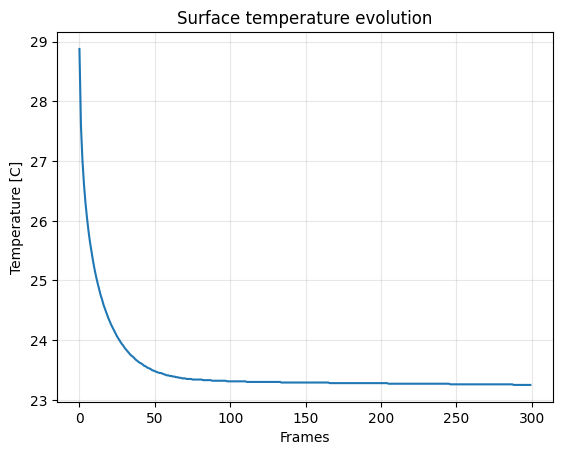

In [81]:
plt.plot(data['data'][34:,256,256])
plt.xlabel('Frames')
plt.ylabel('Temperature [C]')
plt.grid(alpha=0.3)
plt.title("Surface temperature evolution")

Text(0.5, 1.0, 'Surface temperature evolution')

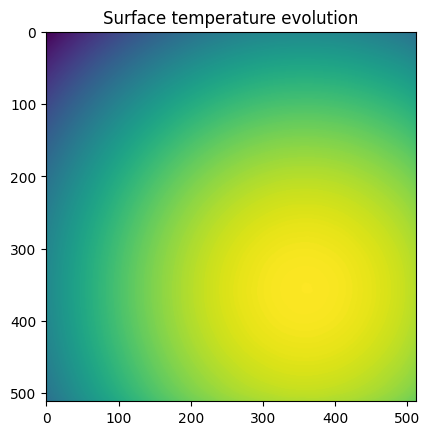

In [82]:
plt.imshow(data['data'][34,:,:])
plt.title("Surface temperature evolution")

In [83]:
data_cube = torch.tensor(data['data'][34:,:,:], dtype=torch.float32)
data_cube=(data_cube-data_cube.min())/(data_cube.max()-data_cube.min()) # Normalization of the temperature data

Text(0.5, 1.0, 'Surface temperature evolution')

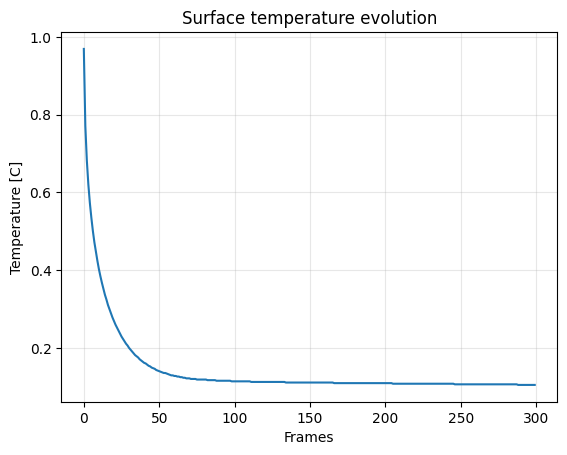

In [84]:
plt.plot(data_cube[:,256,256])
plt.xlabel('Frames')
plt.ylabel('Temperature [C]')
plt.grid(alpha=0.3)
plt.title("Surface temperature evolution")